### 1. Configuração do Ambiente

In [ ]:
#!pip install "cognite-sdk[pandas]" matplotlib seaborn tensorflow plotly -q

import os
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from IPython.display import display
from sklearn.preprocessing import RobustScaler
from statsmodels.tsa.stattools import acf
from tsdiffusion_transformed.dataloader import DataLoader
import json
from getpass import getpass
#import tensorflow as tf
#from tensorflow import keras

print("Bibliotecas importadas com sucesso!")

Updated: UnsupervisedStateSegmenter now supports multi-channel (multivariate) series.

Bibliotecas importadas com sucesso!


/root/coppe/3Wve/lib/python3.12/site-packages/ipykernel/ipkernel.py:772: UserWarning: You are using version='7.83.1' of the SDK, however version='7.90.1' is available. To suppress this warning, either upgrade or do the following:
>>> from cognite.client.config import global_config
>>> global_config.disable_pypi_version_check = True
  _threading_Thread_run(self)


In [2]:
import debugpy
debugpy.listen(('0.0.0.0', 5678))

('0.0.0.0', 5678)

In [5]:
os.environ['COGNITE_CLIENT_SECRET'] = getpass("Enter COGNITE_CLIENT")

### 2. Ativar o DataLoader

In [6]:
import importlib
import sys
importlib.reload(sys.modules['tsdiffusion_transformed.dataloader'])
from tsdiffusion_transformed.dataloader import DataLoader
dl = DataLoader()
dl.add_segments(segments=3, window=10, step=10, series=[
    'PH (CBM) 1st Stg ActCompr Poly Head',
    'PH (CBM) 1st Stage ActShaft Power',
    'PH (CBM) 1st Stg ActCompr Poly Head',
    'PH (CBM) 1st Stage ActPress Ratio'  
], path="segmenter_model_10.pkl"
)
#dl.segmenter.save("segmenter_model_10.pkl")



Buscando dados para as 12 séries temporais encontradas.


### 5. Análise de Séries Temporais

### 6. Análise Exploratória dos Dados (EDA)

Com os dados coletados e as colunas renomeadas, podemos realizar uma análise mais clara e informativa.

#### 6.1. Informações e Estatísticas Descritivas

In [4]:
df_data_descriptive = dl.df
if not df_data_descriptive.empty:
    print("Informações Gerais do DataFrame:")
    df_data_descriptive.info()

    print("\n\nEstatísticas Descritivas:")
    display(df_data_descriptive.describe())
else:
    print("DataFrame de dados está vazio.")

Informações Gerais do DataFrame:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 269800 entries, 2019-09-01 03:00:16 to 2019-12-01 02:40:14
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   PH (CBM) 1st Stage ExpPress Ratio     257216 non-null  float64
 1   PH (CBM) 1st Stage Poly Head Dev      257214 non-null  float64
 2   PH (CBM) 1st Stage ActShaft Power     257197 non-null  float64
 3   PH (CBM) 1st Stage Press Rat Dev      257221 non-null  float64
 4   PH (CBM) 1st Stg ActCompr Poly Head   257178 non-null  float64
 5   PH (CBM) 1st Stage Shft Pwr Dev       257223 non-null  float64
 6   PH (CBM) 1st Stage ActCompr Poly Eff  257177 non-null  float64
 7   PH (CBM) 1st Stage ExpCompr Poly Eff  257184 non-null  float64
 8   PH (CBM) 1st Stage ExpShaft Power     257213 non-null  float64
 9   PH (CBM) 1st Stage ActPress Ratio     257022 non-null  float64
 10  P

,PH (CBM) 1st Stage ExpPress Ratio,PH (CBM) 1st Stage Poly Head Dev,PH (CBM) 1st Stage ActShaft Power,PH (CBM) 1st Stage Press Rat Dev,PH (CBM) 1st Stg ActCompr Poly Head,PH (CBM) 1st Stage Shft Pwr Dev,PH (CBM) 1st Stage ActCompr Poly Eff,PH (CBM) 1st Stage ExpCompr Poly Eff,PH (CBM) 1st Stage ExpShaft Power,PH (CBM) 1st Stage ActPress Ratio,PH (CBM) 1st Stg ExpCompr Poly Head,states
count,257216.000000,257214.000000,257197.000000,257221.000000,257178.000000,257223.000000,257177.000000,257184.000000,257213.000000,257022.000000,257219.000000,269800.000000
mean,3.076324,14.519883,9104.711323,18.470310,164.708592,9.839917,83.518122,80.171857,8290.871756,3.633769,144.266829,0.220460
std,0.179575,7.287104,464.145385,7.521138,5.610111,3.985167,12.106992,2.568236,357.952391,0.128822,8.456745,0.914361
min,0.000000,-50.689212,-494.728680,-37.411146,0.000000,-104.442267,-742.348504,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.995687,9.168176,8870.910019,12.918120,163.009508,6.998400,82.141739,80.335649,8125.595928,3.589594,140.684675,0.000000
50%,3.110289,13.411547,9086.893399,17.637755,164.896667,9.219129,83.467278,80.667876,8276.870903,3.639628,145.988263,0.000000
75%,3.196069,18.339230,9319.738472,22.726350,166.831206,12.245444,84.896927,80.806429,8443.366160,3.687220,149.842605,0.000000
max,3.438750,98.038000,13490.593928,89.471926,176.638488,34.117310,5879.049525,80.873058,11967.419481,3.957146,159.482564,5.000000


#### 6.2. Visualização dos Dados

**a) Gráfico das Séries Temporais**

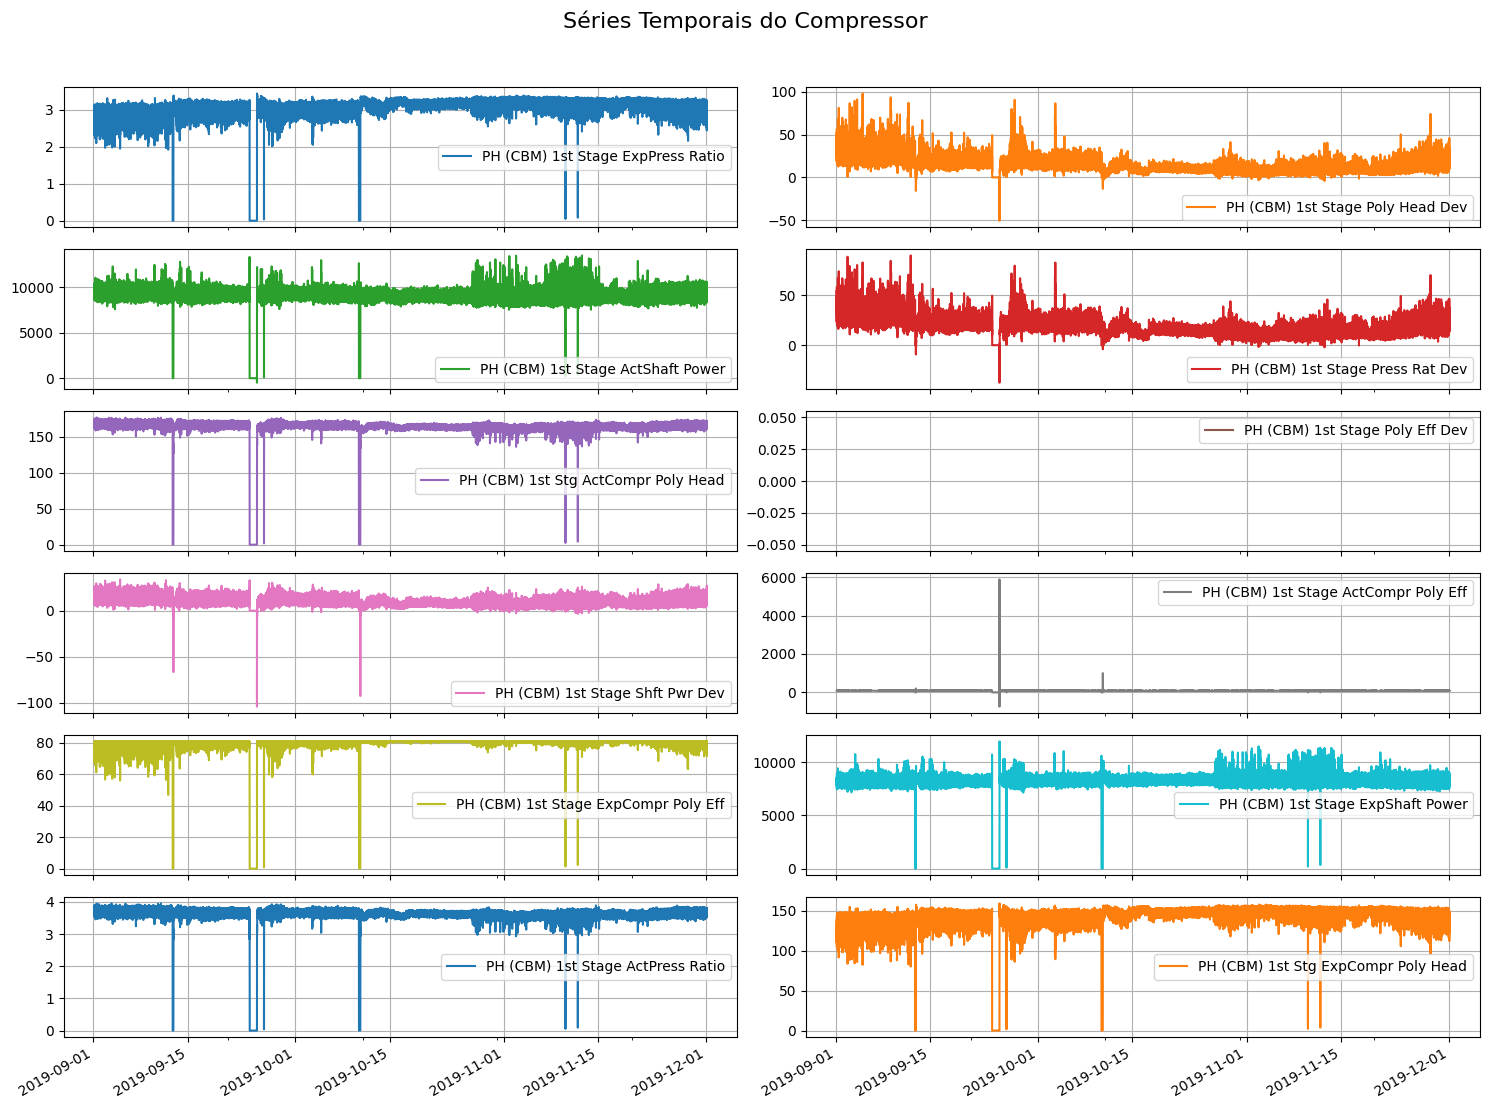

In [29]:
if not df_data_descriptive.empty:
    # Interpola valores nulos para melhor visualização
    df_plot = df_data_descriptive.interpolate()
    df_plot.plot(figsize=(15, 12), subplots=True, layout=(-1, 2), sharex=True, grid=True)
    plt.suptitle("Séries Temporais do Compressor", y=0.92, fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.9]) # Ajuste de layout para evitar sobreposição do título
    plt.show()
else:
    print("DataFrame de dados está vazio.")

**b) Distribuição das Variáveis (Histogramas)**

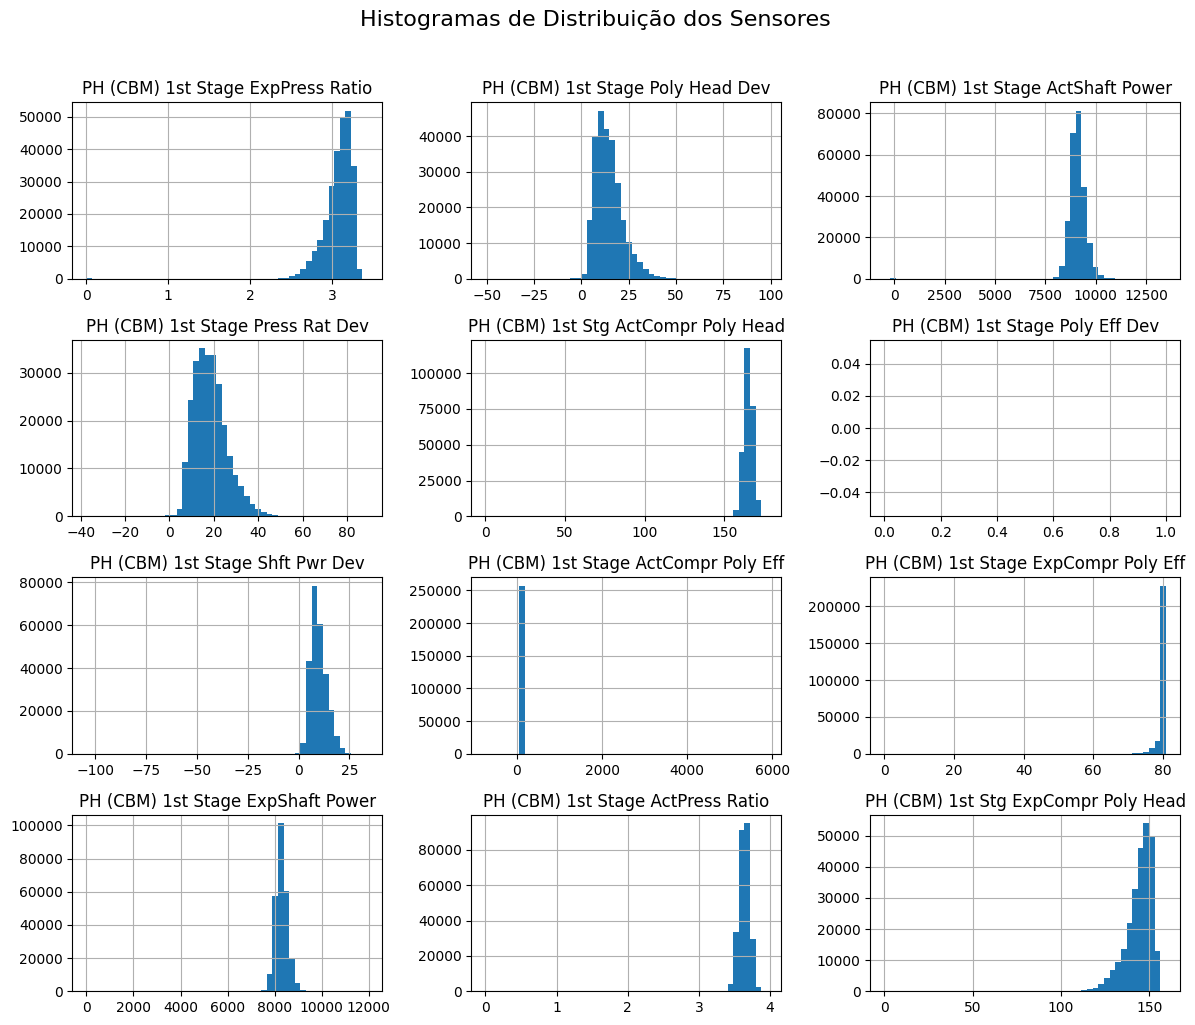

In [30]:
if not df_data_descriptive.empty:
    df_data_descriptive.hist(figsize=(12, 10), bins=50, layout=(-1, 3), sharex=False, sharey=False)
    plt.suptitle("Histogramas de Distribuição dos Sensores", y=1.02, fontsize=16)
    plt.tight_layout()
    plt.show()
else:
    print("DataFrame de dados está vazio.")

**c) Matriz de Correlação**

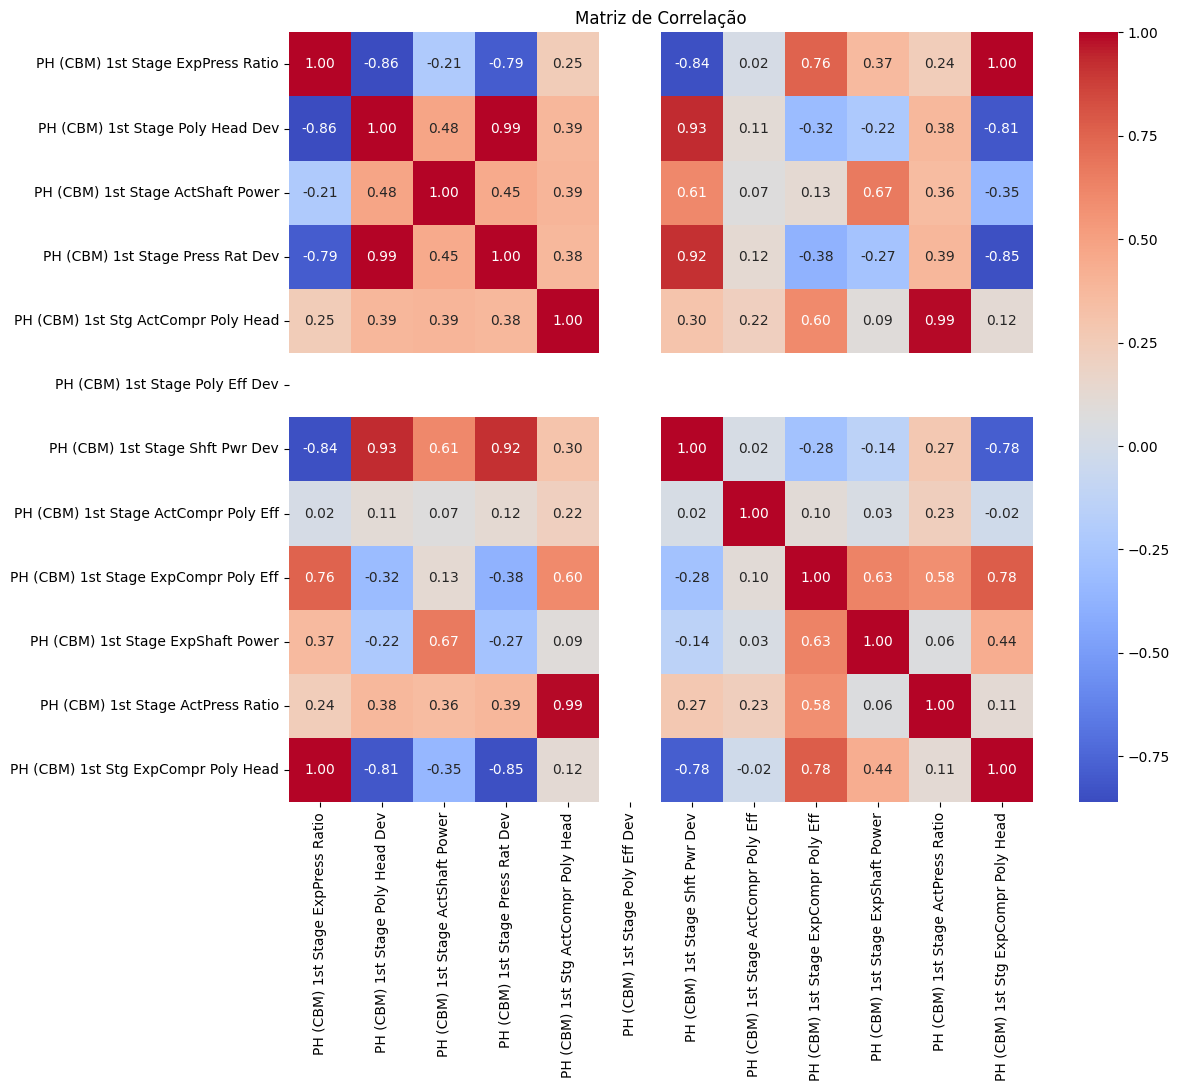

In [31]:
if not df_data_descriptive.empty:
    # Renomeia colunas para serem mais curtas para o gráfico de correlação
    correlation_df = df_data.rename(columns=lambda c: c.replace('PH (CBM)', '').replace(':VALUE', ''))
    # Usamos os nomes descritivos para a matriz de correlação
    correlation_matrix = df_data_descriptive.corr()

    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Matriz de Correlação")
    plt.show()
else:
    print("DataFrame de dados está vazio.")

#### 6.3. Análise Exploratória Adicional (Gemini)

Para aprofundar a análise, técnicas adicionais foram incluídas pelo Gemini para entender a distribuição dos dados e suas tendências temporais.

* **Box Plots:** Ajudam a identificar a dispersão, a mediana e os outliers em cada sensor, oferecendo uma visão clara da variabilidade.
* **Estatísticas Móveis:** O cálculo da média e do desvio padrão em janelas de tempo deslizantes revela tendências e mudanças na volatilidade dos sinais, que são difíceis de perceber em gráficos estáticos.
* **Gráficos Interativos:** Permitem uma exploração mais detalhada e flexível dos dados, com zoom e informações pontuais.

**d) Box Plots para Distribuição e Outliers**

In [ ]:
if not df_data_descriptive.empty:
    # Usa o dataframe com nomes descritivos
    df_melt = df_data_descriptive.drop(columns=['PH (CBM) 1st Stage Poly Eff Dev']).melt() # Remove a coluna vazia

    fig = px.box(df_melt, x='variable', y='value', color='variable',
                 title="Distribuição e Outliers por Sensor")
    fig.update_xaxes(title_text="Sensor")
    fig.update_yaxes(title_text="Valor")
    fig.show()
else:
    print("DataFrame de dados está vazio.")

**e) Análise de Tendências com Estatísticas Móveis**

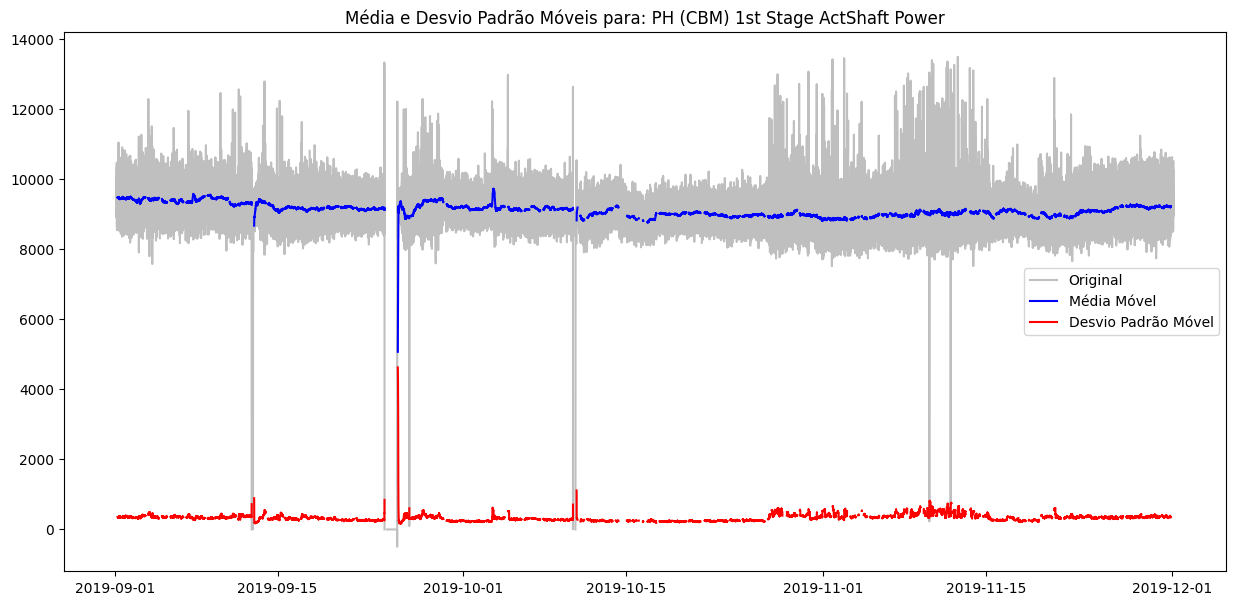

In [33]:
power_sensor = 'PH (CBM) 1st Stage ActShaft Power' # Usando o nome descritivo
if power_sensor in df_data_descriptive.columns:
    window = 288 # Janela de 1 dia (288 pontos de 5min)

    rolling_mean = df_data_descriptive[power_sensor].rolling(window=window).mean()
    rolling_std = df_data_descriptive[power_sensor].rolling(window=window).std()

    plt.figure(figsize=(15, 7))
    plt.title(f'Média e Desvio Padrão Móveis para: {power_sensor}')
    plt.plot(df_data_descriptive.index, df_data_descriptive[power_sensor], label='Original', color='gray', alpha=0.5)
    plt.plot(rolling_mean, label='Média Móvel', color='blue')
    plt.plot(rolling_std, label='Desvio Padrão Móvel', color='red')
    plt.legend()
    plt.show()
else:
    print(f"A coluna '{power_sensor}' não foi encontrada.")

**f) Gráfico Interativo das Séries Temporais**

In [ ]:
if not df_data_descriptive.empty:
    fig = px.line(df_data_descriptive.interpolate(), title='Séries Temporais Interativas do Compressor')
    fig.update_xaxes(title_text="Data e Hora")
    fig.update_yaxes(title_text="Valor do Sensor")
    fig.show()
else:
    print("DataFrame de dados está vazio.")

---

### 8. Análise de janela ideal

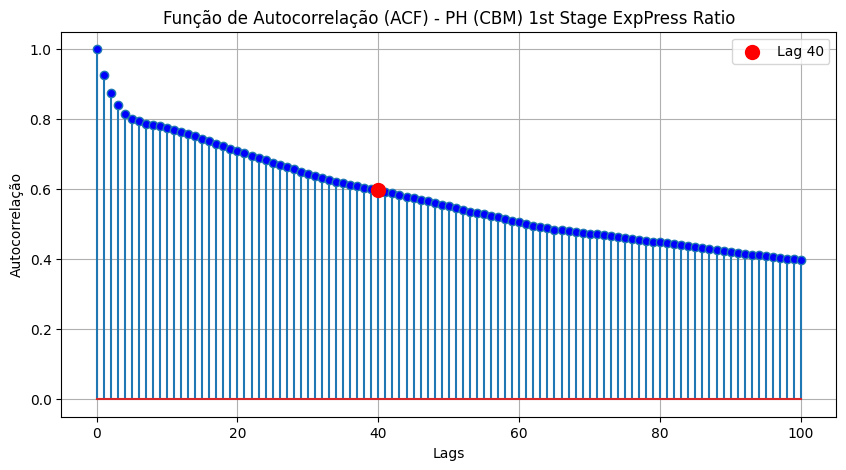

In [16]:
df = df_data_descriptive.copy()
df.bfill(inplace=True)
df.ffill(inplace=True)
acf_values = acf(df['PH (CBM) 1st Stage ActPress Ratio'], nlags=100, fft=True)
lags = np.arange(len(acf_values))

plt.figure(figsize=(10, 5))
markerline, stemlines, baseline = plt.stem(lags, acf_values)
plt.setp(markerline, 'markerfacecolor', 'blue')  # cor padrão

# Destacar lag=30
plt.scatter(40, acf_values[40], color='red', s=100, zorder=3, label='Lag 40')

plt.title('Função de Autocorrelação (ACF) - PH (CBM) 1st Stage ExpPress Ratio')
plt.xlabel('Lags')
plt.ylabel('Autocorrelação')
plt.grid()
plt.legend()
plt.show()
 

In [14]:
acf_values

array([1.        , 0.92501796, 0.87452033, 0.84156798, 0.81413884,
       0.80082331, 0.79424166, 0.787741  , 0.78316597, 0.77941528,
       0.77431126, 0.76969723, 0.76444052, 0.75768771, 0.75074146,
       0.74391665, 0.73667186, 0.73017634, 0.72305676, 0.71603248,
       0.70930206, 0.70217579, 0.69571386, 0.68918295, 0.68250459,
       0.67575312, 0.6691628 , 0.66302265, 0.65657892, 0.65030804,
       0.64418586, 0.63797706, 0.63211807, 0.62598373, 0.62060192,
       0.61640144, 0.61255359, 0.60858318, 0.60470919, 0.60101575,
       0.59687159, 0.59288386, 0.58874554, 0.58375851, 0.57902712,
       0.57397055, 0.56955655, 0.56534887, 0.56108574, 0.55627669,
       0.55080334, 0.54542199, 0.54063974, 0.53617446, 0.53198362,
       0.52793933, 0.52369015, 0.51942601, 0.51484929, 0.51033945,
       0.50552684, 0.50009935, 0.49514914, 0.49166806, 0.48812999,
       0.48479502, 0.48228219, 0.47995272, 0.47765965, 0.4752904 ,
       0.47310964, 0.47079025, 0.46821857, 0.46551039, 0.46283

### 9.1 6 estados

/root/coppe/3Wve/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


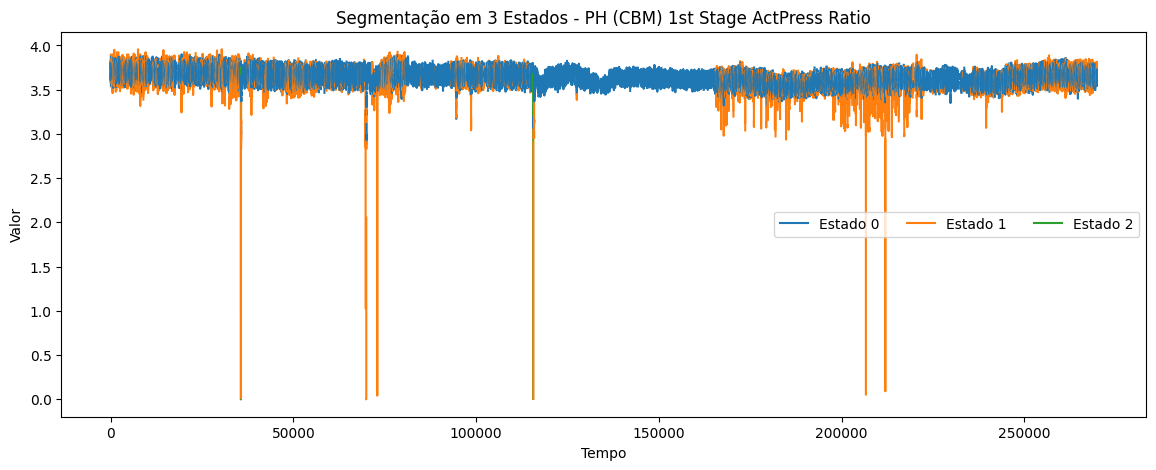

In [101]:
series = np.asarray(dl.df['PH (CBM) 1st Stage ActPress Ratio'])  # sua série original
idx = dl.pred["window_indices"]  # lista de (start, end) das janelas
states = dl.pred["states_per_window"]       # estado por janela
k = len(np.unique(states))   # número de estados únicos

plt.figure(figsize=(14, 5))

for (start, end), state in zip(idx, states):
    plt.plot(
        range(start, end),
        series[start:end],
        label=f"Estado {state}",
        color=plt.cm.tab10(state % 10)  # cores automáticas
    )

plt.title("Segmentação em 3 Estados - PH (CBM) 1st Stage ActPress Ratio")
plt.xlabel("Tempo")
plt.ylabel("Valor")
# legenda compacta sem duplicados
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), ncol=k)
plt.show()

### 10 Pós-processamento

In [7]:
for i in [2]:
    dl.df['states'].replace(i, 1, inplace=True) # Merge states 1 and 2


/tmp/ipykernel_155127/3961075041.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dl.df['states'].replace(i, 1, inplace=True) # Merge states 1 and 2


In [8]:
dl.add_time_to_change_state_timestamp()

### Geração Deep

In [261]:
importlib.reload(sys.modules['tsdiffusion_transformed.tsdiffusion'])
importlib.reload(sys.modules['tsdiffusion_transformed.deep'])
importlib.reload(sys.modules['tsdiffusion_transformed.lstm'])
importlib.reload(sys.modules['tsdiffusion_transformed.gru'])

from tsdiffusion_transformed.ode_jump import ODEJump
from tsdiffusion_transformed.deep import TSDF_DEEP

In [269]:
model = TSDF_DEEP(
    in_channels=11,
    hidden_dim=11*32,
    cost_columns=[
        'PH (CBM) 1st Stg ActCompr Poly Head',
        'PH (CBM) 1st Stage ActShaft Power',
        'PH (CBM) 1st Stg ActCompr Poly Head',
        'PH (CBM) 1st Stage ActPress Ratio'
        ],
    lam=[0., 0.0, 0.0, 0.0, 1.0, 0.0],
    #status_dim=3,
    sigma_temp=0.6,
    log_likelihood = False,
    use_layernorm=False
)

In [270]:
res = model.train_cognite(
    df=dl.df,
    feature_cols=list(dl.df.columns[:-3]),
    static_features_cols=None,
    timestamp_col='index',
    states_col='states',
    batch_size=256,
    window_size=10,
    window_step=10,
    epochs = 500,
    validate=False,
    patience=50,
    kl_warmup_epochs=20,
    kl_start=0.01,
    rebuild=False,
    reconstruction_test=False,
    warmup_steps=0,
    min_lr_factor=1,
    optimizer_name='adam',
    optimizer_params={}
)
res = [r for r in res if r is not None]  # remove None results
with open("final_rebuild_deep_.json", "w") as f:
    json.dump(res, f)

/root/coppe/CPE727-2025-03/Seminarios/6 - RNN/tsdiffusion_transformed/tsdiffusion.py:637: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  ds.tensors = (torch.tensor(x_all_scaled, dtype=torch.float32),) + ds.tensors[1:]


GRUPOS (total): {0: 24346, 1: 2637}
GRUPOS (train): {0: 19477, 1: 2110}
GRUPOS (test):  {0: 4869, 1: 527}
Epoch 1/500 | Train(sampled) L1:0.000000 L2:0.000000 L3:0.000000 L4:0.000000 L5:540198.005172 L6:0.000000 | 
          >> Test (VAE) macro:1.131798 ± 0.495990 | micro:0.734555 ± 0.208033 | ELBO:1.803786 NLL:1.307317 cov90:0.910 width90:2.560242
Epoch 2/500 | Train(sampled) L1:0.000000 L2:0.000000 L3:0.000000 L4:0.000000 L5:1.199995 L6:0.000000 | 
          >> Test (VAE) macro:1.192386 ± 0.517128 | micro:0.778213 ± 0.210982 | ELBO:2.312076 NLL:1.445835 cov90:0.880 width90:2.444481
Epoch 3/500 | Train(sampled) L1:0.000000 L2:0.000000 L3:0.000000 L4:0.000000 L5:1.064083 L6:0.000000 | 
          >> Test (VAE) macro:1.174886 ± 0.329023 | micro:0.911368 ± 0.204209 | ELBO:2.136183 NLL:1.424787 cov90:0.895 width90:2.627130
Epoch 4/500 | Train(sampled) L1:0.000000 L2:0.000000 L3:0.000000 L4:0.000000 L5:1.025991 L6:0.000000 | 
          >> Test (VAE) macro:1.252562 ± 0.343857 | micro:0.97716

### Geração LSTM

In [271]:
importlib.reload(sys.modules['tsdiffusion_transformed.tsdiffusion'])
importlib.reload(sys.modules['tsdiffusion_transformed.lstm'])
from tsdiffusion_transformed.lstm import TSDF_LSTM

In [272]:
model = TSDF_LSTM(
    in_channels=11,
    hidden_dim=11*32,
    cost_columns=[
        'PH (CBM) 1st Stg ActCompr Poly Head',
        'PH (CBM) 1st Stage ActShaft Power',
        'PH (CBM) 1st Stg ActCompr Poly Head',
        'PH (CBM) 1st Stage ActPress Ratio'
        ],
    lam=[0., 0.0, 0.0, 0.0, 1.0, 0.0],
    #status_dim=3,
    sigma_temp=0.6,
    log_likelihood = False,
    use_layernorm=False
)

/root/coppe/3Wve/lib/python3.12/site-packages/torch/nn/modules/transformer.py:382: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.norm_first was True
  warnings.warn(


In [273]:
res = model.train_cognite(
    df=dl.df,
    feature_cols=list(dl.df.columns[:-3]),
    static_features_cols=None,
    timestamp_col='index',
    states_col='states',
    batch_size=256,
    window_size=10,
    window_step=10,
    epochs = 500,
    validate=False,
    patience=50,
    kl_warmup_epochs=20,
    kl_start=0.01,
    #kl_end=1,
    rebuild=False,
    reconstruction_test=False,
    warmup_steps=0,
    min_lr_factor=1,
    optimizer_name='adam',
    optimizer_params={}
)
res = [r for r in res if r is not None]  # remove None results
with open("final_rebuild_lstm_.json", "w") as f:
    json.dump(res, f)

/root/coppe/CPE727-2025-03/Seminarios/6 - RNN/tsdiffusion_transformed/tsdiffusion.py:637: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  ds.tensors = (torch.tensor(x_all_scaled, dtype=torch.float32),) + ds.tensors[1:]


GRUPOS (total): {0: 24346, 1: 2637}
GRUPOS (train): {0: 19477, 1: 2110}
GRUPOS (test):  {0: 4869, 1: 527}
Epoch 1/500 | Train(sampled) L1:0.000000 L2:0.000000 L3:0.000000 L4:0.000000 L5:0.769490 L6:0.000000 | 
          >> Test (VAE) macro:0.829532 ± 0.281230 | micro:0.604292 ± 0.171853 | ELBO:1.662791 NLL:1.059620 cov90:0.864 width90:2.295509
Epoch 2/500 | Train(sampled) L1:0.000000 L2:0.000000 L3:0.000000 L4:0.000000 L5:-0.556771 L6:0.000000 | 
          >> Test (VAE) macro:0.784453 ± 0.259493 | micro:0.576622 ± 0.166792 | ELBO:2.552914 NLL:0.917118 cov90:0.902 width90:2.412552
Epoch 3/500 | Train(sampled) L1:0.000000 L2:0.000000 L3:0.000000 L4:0.000000 L5:-0.756939 L6:0.000000 | 
          >> Test (VAE) macro:0.726555 ± 0.241761 | micro:0.532926 ± 0.163065 | ELBO:2.732827 NLL:0.863821 cov90:0.910 width90:2.434654
Epoch 4/500 | Train(sampled) L1:0.000000 L2:0.000000 L3:0.000000 L4:0.000000 L5:-0.875078 L6:0.000000 | 
          >> Test (VAE) macro:0.667199 ± 0.228071 | micro:0.484534 

### Geração GRU

In [274]:
from tsdiffusion_transformed.gru import TSDF_GRU

In [275]:
model = TSDF_GRU(
    in_channels=11,
    hidden_dim=11*32,
    cost_columns=[
        'PH (CBM) 1st Stg ActCompr Poly Head',
        'PH (CBM) 1st Stage ActShaft Power',
        'PH (CBM) 1st Stg ActCompr Poly Head',
        'PH (CBM) 1st Stage ActPress Ratio'
        ],
    lam=[0., 0.0, 0.0, 0.0, 1.0, 0.0],
    #status_dim=3,
    sigma_temp=0.6,
    log_likelihood = False,
    use_layernorm=False
)

/root/coppe/3Wve/lib/python3.12/site-packages/torch/nn/modules/transformer.py:382: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.norm_first was True
  warnings.warn(


In [276]:
res = model.train_cognite(
    df=dl.df,
    feature_cols=list(dl.df.columns[:-3]),
    static_features_cols=None,
    timestamp_col='index',
    states_col='states',
    batch_size=256,
    window_size=10,
    window_step=10,
    epochs = 500,
    validate=False,
    patience=50,
    kl_warmup_epochs=20,
    kl_start=0.01,
    rebuild=False,
    reconstruction_test=False,
    warmup_steps=0,
    min_lr_factor=1,
    optimizer_name='adam',
    optimizer_params={}
)
res = [r for r in res if r is not None]  # remove None results
with open("final_rebuild_gru_.json", "w") as f:
    json.dump(res, f)

/root/coppe/CPE727-2025-03/Seminarios/6 - RNN/tsdiffusion_transformed/tsdiffusion.py:637: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  ds.tensors = (torch.tensor(x_all_scaled, dtype=torch.float32),) + ds.tensors[1:]


GRUPOS (total): {0: 24346, 1: 2637}
GRUPOS (train): {0: 19477, 1: 2110}
GRUPOS (test):  {0: 4869, 1: 527}
Epoch 1/500 | Train(sampled) L1:0.000000 L2:0.000000 L3:0.000000 L4:0.000000 L5:0.746276 L6:0.000000 | 
          >> Test (VAE) macro:0.775417 ± 0.266912 | micro:0.561645 ± 0.153121 | ELBO:1.858328 NLL:1.036421 cov90:0.877 width90:2.326329
Epoch 2/500 | Train(sampled) L1:0.000000 L2:0.000000 L3:0.000000 L4:0.000000 L5:-0.664487 L6:0.000000 | 
          >> Test (VAE) macro:0.827738 ± 0.282124 | micro:0.601782 ± 0.151582 | ELBO:2.660097 NLL:0.970181 cov90:0.907 width90:2.486419
Epoch 3/500 | Train(sampled) L1:0.000000 L2:0.000000 L3:0.000000 L4:0.000000 L5:-0.878079 L6:0.000000 | 
          >> Test (VAE) macro:0.759242 ± 0.263742 | micro:0.548008 ± 0.149105 | ELBO:2.852774 NLL:0.912955 cov90:0.915 width90:2.502214
Epoch 4/500 | Train(sampled) L1:0.000000 L2:0.000000 L3:0.000000 L4:0.000000 L5:-0.951492 L6:0.000000 | 
          >> Test (VAE) macro:0.706967 ± 0.254183 | micro:0.503389 

### Geração BiLSTM

In [277]:
#importlib.reload(sys.modules['tsdiffusion_transformed.lstm'])
from tsdiffusion_transformed.lstm import TSDF_LSTM

In [278]:
model = TSDF_LSTM(
    in_channels=11,
    hidden_dim=11*32,
    cost_columns=[
        'PH (CBM) 1st Stg ActCompr Poly Head',
        'PH (CBM) 1st Stage ActShaft Power',
        'PH (CBM) 1st Stg ActCompr Poly Head',
        'PH (CBM) 1st Stage ActPress Ratio'
        ],
    lam=[0., 0.0, 0.0, 0.0, 1.0, 0.0],
    #status_dim=3,
    sigma_temp=0.6,
    log_likelihood = False,
    use_layernorm=False,
    bi_lstm=True,
    bi_method='gru'
)

/root/coppe/3Wve/lib/python3.12/site-packages/torch/nn/modules/transformer.py:382: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.norm_first was True
  warnings.warn(


In [279]:
res = model.train_cognite(
    df=dl.df,
    feature_cols=list(dl.df.columns[:-3]),
    static_features_cols=None,
    timestamp_col='index',
    states_col='states',
    batch_size=256,
    window_size=10,
    window_step=10,
    epochs = 500,
    validate=False,
    patience=50,
    kl_warmup_epochs=20,
    kl_start=0.01,
    rebuild=False,
    reconstruction_test=False,
    warmup_steps=0,
    min_lr_factor=1,
    optimizer_name='adam',
    optimizer_params={}
)
res = [r for r in res if r is not None]  # remove None results
with open("final_rebuild_bilstm_.json", "w") as f:
    json.dump(res, f)

/root/coppe/CPE727-2025-03/Seminarios/6 - RNN/tsdiffusion_transformed/tsdiffusion.py:637: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  ds.tensors = (torch.tensor(x_all_scaled, dtype=torch.float32),) + ds.tensors[1:]


GRUPOS (total): {0: 24346, 1: 2637}
GRUPOS (train): {0: 19477, 1: 2110}
GRUPOS (test):  {0: 4869, 1: 527}
Epoch 1/500 | Train(sampled) L1:0.000000 L2:0.000000 L3:0.000000 L4:0.000000 L5:1.024342 L6:0.000000 | 
          >> Test (VAE) macro:0.832592 ± 0.261524 | micro:0.623135 ± 0.173314 | ELBO:1.603091 NLL:1.097884 cov90:0.860 width90:2.278685
Epoch 2/500 | Train(sampled) L1:0.000000 L2:0.000000 L3:0.000000 L4:0.000000 L5:-0.291160 L6:0.000000 | 
          >> Test (VAE) macro:0.788360 ± 0.259941 | micro:0.580171 ± 0.167004 | ELBO:2.388987 NLL:0.944916 cov90:0.889 width90:2.339993
Epoch 3/500 | Train(sampled) L1:0.000000 L2:0.000000 L3:0.000000 L4:0.000000 L5:-0.676498 L6:0.000000 | 
          >> Test (VAE) macro:0.720965 ± 0.224759 | micro:0.540953 ± 0.160443 | ELBO:2.712175 NLL:0.873011 cov90:0.904 width90:2.411303
Epoch 4/500 | Train(sampled) L1:0.000000 L2:0.000000 L3:0.000000 L4:0.000000 L5:-0.681055 L6:0.000000 | 
          >> Test (VAE) macro:0.685202 ± 0.229718 | micro:0.501218 

### Geração BiGRU

In [280]:
importlib.reload(sys.modules['tsdiffusion_transformed.gru'])
from tsdiffusion_transformed.gru import TSDF_GRU

In [281]:
model = TSDF_GRU(
    in_channels=11,
    hidden_dim=11*32,
    cost_columns=[
        'PH (CBM) 1st Stg ActCompr Poly Head',
        'PH (CBM) 1st Stage ActShaft Power',
        'PH (CBM) 1st Stg ActCompr Poly Head',
        'PH (CBM) 1st Stage ActPress Ratio'
        ],
    lam=[0., 0.0, 0.0, 0.0, 1.0, 0.0],
    #status_dim=3,
    sigma_temp=0.6,
    log_likelihood = False,
    use_layernorm=False,
    bi_gru=True,
    bi_method='gru'
)

/root/coppe/3Wve/lib/python3.12/site-packages/torch/nn/modules/transformer.py:382: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.norm_first was True
  warnings.warn(


In [282]:
res = model.train_cognite(
    df=dl.df,
    feature_cols=list(dl.df.columns[:-3]),
    static_features_cols=None,
    timestamp_col='index',
    states_col='states',
    batch_size=256,
    window_size=10,
    window_step=10,
    epochs = 500,
    validate=False,
    patience=50,
    kl_warmup_epochs=20,
    kl_start=0.01,
    rebuild=False,
    reconstruction_test=False,
    warmup_steps=0,
    min_lr_factor=1,
    optimizer_name='adam',
    optimizer_params={}
)
res = [r for r in res if r is not None]  # remove None results
with open("final_rebuild_bigru_.json", "w") as f:
    json.dump(res, f)

/root/coppe/CPE727-2025-03/Seminarios/6 - RNN/tsdiffusion_transformed/tsdiffusion.py:637: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  ds.tensors = (torch.tensor(x_all_scaled, dtype=torch.float32),) + ds.tensors[1:]


GRUPOS (total): {0: 24346, 1: 2637}
GRUPOS (train): {0: 19477, 1: 2110}
GRUPOS (test):  {0: 4869, 1: 527}
Epoch 1/500 | Train(sampled) L1:0.000000 L2:0.000000 L3:0.000000 L4:0.000000 L5:0.808207 L6:0.000000 | 
          >> Test (VAE) macro:0.755428 ± 0.288058 | micro:0.524720 ± 0.170307 | ELBO:1.840620 NLL:0.882393 cov90:0.882 width90:2.260861
Epoch 2/500 | Train(sampled) L1:0.000000 L2:0.000000 L3:0.000000 L4:0.000000 L5:-0.421569 L6:0.000000 | 
          >> Test (VAE) macro:0.757650 ± 0.257223 | micro:0.551638 ± 0.171018 | ELBO:2.534694 NLL:0.873275 cov90:0.899 width90:2.345034
Epoch 3/500 | Train(sampled) L1:0.000000 L2:0.000000 L3:0.000000 L4:0.000000 L5:-0.813448 L6:0.000000 | 
          >> Test (VAE) macro:0.701106 ± 0.242335 | micro:0.507018 ± 0.157835 | ELBO:2.957255 NLL:0.820787 cov90:0.913 width90:2.409439
Epoch 4/500 | Train(sampled) L1:0.000000 L2:0.000000 L3:0.000000 L4:0.000000 L5:-0.900002 L6:0.000000 | 
          >> Test (VAE) macro:0.638461 ± 0.211670 | micro:0.468932 

### Geração BiLSTM Warm Up e Learning Rate Scheduling

In [283]:
from tsdiffusion_transformed.lstm import TSDF_LSTM

In [284]:
model = TSDF_LSTM(
    in_channels=11,
    hidden_dim=11*32,
    cost_columns=[
        'PH (CBM) 1st Stg ActCompr Poly Head',
        'PH (CBM) 1st Stage ActShaft Power',
        'PH (CBM) 1st Stg ActCompr Poly Head',
        'PH (CBM) 1st Stage ActPress Ratio'
        ],
    lam=[0., 0.0, 0.0, 0.0, 1.0, 0.0],
    #status_dim=3,
    sigma_temp=0.6,
    log_likelihood = False,
    use_layernorm=False,
    bi_lstm=True,
    bi_method='gru'
)

/root/coppe/3Wve/lib/python3.12/site-packages/torch/nn/modules/transformer.py:382: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.norm_first was True
  warnings.warn(


In [285]:
res = model.train_cognite(
    df=dl.df,
    feature_cols=list(dl.df.columns[:-3]),
    static_features_cols=None,
    timestamp_col='index',
    states_col='states',
    batch_size=256,
    window_size=10,
    window_step=10,
    epochs = 500,
    validate=False,
    patience=50,
    kl_warmup_epochs=20,
    kl_start=0.01,
    rebuild=False,
    reconstruction_test=False,
    warmup_steps=50,
    min_lr_factor=0.01,
    optimizer_name='adam',
    optimizer_params={}
)
res = [r for r in res if r is not None]  # remove None results
with open("final_rebuild_bilstm_warmup_scheduler.json", "w") as f:
    json.dump(res, f)

/root/coppe/CPE727-2025-03/Seminarios/6 - RNN/tsdiffusion_transformed/tsdiffusion.py:637: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  ds.tensors = (torch.tensor(x_all_scaled, dtype=torch.float32),) + ds.tensors[1:]


GRUPOS (total): {0: 24346, 1: 2637}
GRUPOS (train): {0: 19477, 1: 2110}
GRUPOS (test):  {0: 4869, 1: 527}
Epoch 1/500 | Train(sampled) L1:0.000000 L2:0.000000 L3:0.000000 L4:0.000000 L5:1.493706 L6:0.000000 | 
          >> Test (VAE) macro:0.794400 ± 0.296218 | micro:0.557156 ± 0.168607 | ELBO:1.206547 NLL:0.930112 cov90:0.887 width90:2.361635
Epoch 2/500 | Train(sampled) L1:0.000000 L2:0.000000 L3:0.000000 L4:0.000000 L5:-0.190336 L6:0.000000 | 
          >> Test (VAE) macro:0.772942 ± 0.242041 | micro:0.579088 ± 0.164255 | ELBO:2.436597 NLL:0.941124 cov90:0.892 width90:2.377901
Epoch 3/500 | Train(sampled) L1:0.000000 L2:0.000000 L3:0.000000 L4:0.000000 L5:-0.661749 L6:0.000000 | 
          >> Test (VAE) macro:0.703024 ± 0.231602 | micro:0.517532 ± 0.155184 | ELBO:2.712900 NLL:0.840835 cov90:0.914 width90:2.435610
Epoch 4/500 | Train(sampled) L1:0.000000 L2:0.000000 L3:0.000000 L4:0.000000 L5:-0.781530 L6:0.000000 | 
          >> Test (VAE) macro:0.654703 ± 0.228721 | micro:0.471518 

### Geração BiLSTM RAdam

In [286]:
from tsdiffusion_transformed.lstm import TSDF_LSTM

In [287]:
model = TSDF_LSTM(
    in_channels=11,
    hidden_dim=11*32,
    cost_columns=[
        'PH (CBM) 1st Stg ActCompr Poly Head',
        'PH (CBM) 1st Stage ActShaft Power',
        'PH (CBM) 1st Stg ActCompr Poly Head',
        'PH (CBM) 1st Stage ActPress Ratio'
        ],
    lam=[0., 0.0, 0.0, 0.0, 1.0, 0.0],
    #status_dim=3,
    sigma_temp=0.6,
    log_likelihood = False,
    use_layernorm=False,
    bi_lstm=True,
    bi_method='gru'
)

/root/coppe/3Wve/lib/python3.12/site-packages/torch/nn/modules/transformer.py:382: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.norm_first was True
  warnings.warn(


In [288]:
res = model.train_cognite(
    df=dl.df,
    feature_cols=list(dl.df.columns[:-3]),
    static_features_cols=None,
    timestamp_col='index',
    states_col='states',
    batch_size=256,
    window_size=10,
    window_step=10,
    epochs = 500,
    validate=False,
    patience=50,
    kl_warmup_epochs=20,
    kl_start=0.01,
    rebuild=False,
    reconstruction_test=False,
    warmup_steps=0,
    min_lr_factor=1,
    optimizer_name='radam',
    optimizer_params={}
)
res = [r for r in res if r is not None]  # remove None results
with open("final_rebuild_bilstm_radam.json", "w") as f:
    json.dump(res, f)

/root/coppe/CPE727-2025-03/Seminarios/6 - RNN/tsdiffusion_transformed/tsdiffusion.py:637: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  ds.tensors = (torch.tensor(x_all_scaled, dtype=torch.float32),) + ds.tensors[1:]


GRUPOS (total): {0: 24346, 1: 2637}
GRUPOS (train): {0: 19477, 1: 2110}
GRUPOS (test):  {0: 4869, 1: 527}
Epoch 1/500 | Train(sampled) L1:0.000000 L2:0.000000 L3:0.000000 L4:0.000000 L5:1.565198 L6:0.000000 | 
          >> Test (VAE) macro:0.779910 ± 0.288488 | micro:0.548857 ± 0.171799 | ELBO:1.055506 NLL:0.889446 cov90:0.896 width90:2.372727
Epoch 2/500 | Train(sampled) L1:0.000000 L2:0.000000 L3:0.000000 L4:0.000000 L5:0.002655 L6:0.000000 | 
          >> Test (VAE) macro:0.783834 ± 0.255037 | micro:0.579572 ± 0.166716 | ELBO:2.386819 NLL:0.976227 cov90:0.884 width90:2.330892
Epoch 3/500 | Train(sampled) L1:0.000000 L2:0.000000 L3:0.000000 L4:0.000000 L5:-0.462494 L6:0.000000 | 
          >> Test (VAE) macro:0.751307 ± 0.239346 | micro:0.559612 ± 0.164953 | ELBO:2.694628 NLL:0.906439 cov90:0.901 width90:2.392183
Epoch 4/500 | Train(sampled) L1:0.000000 L2:0.000000 L3:0.000000 L4:0.000000 L5:-0.659497 L6:0.000000 | 
          >> Test (VAE) macro:0.693188 ± 0.226901 | micro:0.511461 ±

### Geração BiLSTM com Variational Dropout (0.2)

In [289]:
importlib.reload(sys.modules['tsdiffusion_transformed.lstm'])
from tsdiffusion_transformed.lstm import TSDF_LSTM

In [290]:
model = TSDF_LSTM(
    in_channels=11,
    hidden_dim=11*32,
    cost_columns=[
        'PH (CBM) 1st Stg ActCompr Poly Head',
        'PH (CBM) 1st Stage ActShaft Power',
        'PH (CBM) 1st Stg ActCompr Poly Head',
        'PH (CBM) 1st Stage ActPress Ratio'
        ],
    lam=[0., 0.0, 0.0, 0.0, 1.0, 0.0],
    #status_dim=3,
    sigma_temp=0.6,
    log_likelihood = False,
    use_layernorm=False,
    bi_lstm=True,
    bi_method='gru',
    variational_dropout=0.2
)

/root/coppe/3Wve/lib/python3.12/site-packages/torch/nn/modules/transformer.py:382: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.norm_first was True
  warnings.warn(


In [291]:
res = model.train_cognite(
    df=dl.df,
    feature_cols=list(dl.df.columns[:-3]),
    static_features_cols=None,
    timestamp_col='index',
    states_col='states',
    batch_size=256,
    window_size=10,
    window_step=10,
    epochs = 500,
    validate=False,
    patience=50,
    kl_warmup_epochs=20,
    kl_start=0.01,
    rebuild=False,
    reconstruction_test=False,
    warmup_steps=0,
    min_lr_factor=1,
    optimizer_name='adam',
    optimizer_params={}
)
res = [r for r in res if r is not None]  # remove None results
with open("final_rebuild_bilstm_vardropout.json", "w") as f:
    json.dump(res, f)

/root/coppe/CPE727-2025-03/Seminarios/6 - RNN/tsdiffusion_transformed/tsdiffusion.py:637: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  ds.tensors = (torch.tensor(x_all_scaled, dtype=torch.float32),) + ds.tensors[1:]


GRUPOS (total): {0: 24346, 1: 2637}
GRUPOS (train): {0: 19477, 1: 2110}
GRUPOS (test):  {0: 4869, 1: 527}
Epoch 1/500 | Train(sampled) L1:0.000000 L2:0.000000 L3:0.000000 L4:0.000000 L5:1.046835 L6:0.000000 | 
          >> Test (VAE) macro:0.776421 ± 0.285640 | micro:0.547649 ± 0.168939 | ELBO:1.658397 NLL:0.898967 cov90:0.868 width90:2.191047
Epoch 2/500 | Train(sampled) L1:0.000000 L2:0.000000 L3:0.000000 L4:0.000000 L5:-0.275582 L6:0.000000 | 
          >> Test (VAE) macro:0.752843 ± 0.252289 | micro:0.550783 ± 0.168084 | ELBO:2.492334 NLL:0.874884 cov90:0.891 width90:2.289395
Epoch 3/500 | Train(sampled) L1:0.000000 L2:0.000000 L3:0.000000 L4:0.000000 L5:-0.568496 L6:0.000000 | 
          >> Test (VAE) macro:0.716327 ± 0.241938 | micro:0.522556 ± 0.168428 | ELBO:2.628179 NLL:0.820894 cov90:0.905 width90:2.338312
Epoch 4/500 | Train(sampled) L1:0.000000 L2:0.000000 L3:0.000000 L4:0.000000 L5:-0.711179 L6:0.000000 | 
          >> Test (VAE) macro:0.658746 ± 0.217274 | micro:0.484729 

### Geração BiLSTM com Difusão (missingness)

In [292]:
importlib.reload(sys.modules['tsdiffusion_transformed.lstm'])
from tsdiffusion_transformed.lstm import TSDF_LSTM

In [293]:
model = TSDF_LSTM(
    in_channels=11,
    hidden_dim=11*32,
    cost_columns=[
        'PH (CBM) 1st Stg ActCompr Poly Head',
        'PH (CBM) 1st Stage ActShaft Power',
        'PH (CBM) 1st Stg ActCompr Poly Head',
        'PH (CBM) 1st Stage ActPress Ratio'
        ],
    lam=[0., 0.0, 0.0, 0.05, 0.95, 0.0],
    #status_dim=3,
    sigma_temp=0.6,
    log_likelihood = False,
    use_layernorm=False,
    bi_lstm=True,
    bi_method='gru'
)

/root/coppe/3Wve/lib/python3.12/site-packages/torch/nn/modules/transformer.py:382: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.norm_first was True
  warnings.warn(


In [294]:
res = model.train_cognite(
    df=dl.df,
    feature_cols=list(dl.df.columns[:-3]),
    static_features_cols=None,
    timestamp_col='index',
    states_col='states',
    batch_size=256,
    window_size=10,
    window_step=10,
    epochs = 500,
    validate=False,
    patience=50,
    kl_warmup_epochs=20,
    kl_start=0.01,
    rebuild=True,
    reconstruction_test=False,
    warmup_steps=0,
    min_lr_factor=1,
    optimizer_name='adam',
    optimizer_params={}
)
res = [r for r in res if r is not None]  # remove None results
with open("final_rebuild_bilstm_diffusion.json", "w") as f:
    json.dump(res, f)

/root/coppe/CPE727-2025-03/Seminarios/6 - RNN/tsdiffusion_transformed/tsdiffusion.py:637: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  ds.tensors = (torch.tensor(x_all_scaled, dtype=torch.float32),) + ds.tensors[1:]


GRUPOS (total): {0: 24346, 1: 2637}
GRUPOS (train): {0: 19477, 1: 2110}
GRUPOS (test):  {0: 4869, 1: 527}
Epoch 1/500 | Train(sampled) L1:0.000000 L2:0.000000 L3:0.000000 L4:0.525895 L5:1.087225 L6:0.000000 | 
          >> Test (VAE) macro:0.723093 ± 0.230456 | micro:0.538519 ± 0.158837 | ELBO:1.474041 NLL:0.838530 cov90:0.910 width90:2.400168
Epoch 2/500 | Train(sampled) L1:0.000000 L2:0.000000 L3:0.000000 L4:0.317218 L5:0.148655 L6:0.000000 | 
          >> Test (VAE) macro:0.645864 ± 0.226925 | micro:0.464117 ± 0.154939 | ELBO:2.370365 NLL:0.762595 cov90:0.924 width90:2.447942
Epoch 3/500 | Train(sampled) L1:0.000000 L2:0.000000 L3:0.000000 L4:0.213003 L5:-0.175154 L6:0.000000 | 
          >> Test (VAE) macro:0.611074 ± 0.211356 | micro:0.441797 ± 0.149661 | ELBO:2.654440 NLL:0.706669 cov90:0.922 width90:2.421651
Epoch 4/500 | Train(sampled) L1:0.000000 L2:0.000000 L3:0.000000 L4:0.169474 L5:-0.242577 L6:0.000000 | 
          >> Test (VAE) macro:0.587411 ± 0.193932 | micro:0.432089 ±

### Geração BiLSTM LayerNorm

In [295]:
importlib.reload(sys.modules['tsdiffusion_transformed.lstm'])
from tsdiffusion_transformed.lstm import TSDF_LSTM

In [296]:
model = TSDF_LSTM(
    in_channels=11,
    hidden_dim=11*32,
    cost_columns=[
        'PH (CBM) 1st Stg ActCompr Poly Head',
        'PH (CBM) 1st Stage ActShaft Power',
        'PH (CBM) 1st Stg ActCompr Poly Head',
        'PH (CBM) 1st Stage ActPress Ratio'
        ],
    lam=[0., 0.0, 0.0, 0.0, 1.0, 0.0],
    #status_dim=3,
    sigma_temp=0.6,
    log_likelihood = False,
    use_layernorm=True,
    bi_lstm=True,
    bi_method='gru'
)

/root/coppe/3Wve/lib/python3.12/site-packages/torch/nn/modules/transformer.py:382: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.norm_first was True
  warnings.warn(


In [297]:
res = model.train_cognite(
    df=dl.df,
    feature_cols=list(dl.df.columns[:-3]),
    static_features_cols=None,
    timestamp_col='index',
    states_col='states',
    batch_size=256,
    window_size=10,
    window_step=10,
    epochs = 500,
    validate=False,
    patience=50,
    kl_warmup_epochs=20,
    kl_start=0.01,
    rebuild=False,
    reconstruction_test=False,
    warmup_steps=0,
    min_lr_factor=1,
    optimizer_name='adam',
    optimizer_params={}
)
res = [r for r in res if r is not None]  # remove None results
with open("final_rebuild_bilstm_layernorm.json", "w") as f:
    json.dump(res, f)

/root/coppe/CPE727-2025-03/Seminarios/6 - RNN/tsdiffusion_transformed/tsdiffusion.py:637: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  ds.tensors = (torch.tensor(x_all_scaled, dtype=torch.float32),) + ds.tensors[1:]


GRUPOS (total): {0: 24346, 1: 2637}
GRUPOS (train): {0: 19477, 1: 2110}
GRUPOS (test):  {0: 4869, 1: 527}
Epoch 1/500 | Train(sampled) L1:0.000000 L2:0.000000 L3:0.000000 L4:0.000000 L5:0.329035 L6:0.000000 | 
          >> Test (VAE) macro:0.729336 ± 0.274869 | micro:0.509190 ± 0.176340 | ELBO:2.212642 NLL:0.748235 cov90:0.915 width90:2.469925
Epoch 2/500 | Train(sampled) L1:0.000000 L2:0.000000 L3:0.000000 L4:0.000000 L5:-0.632927 L6:0.000000 | 
          >> Test (VAE) macro:0.629402 ± 0.185721 | micro:0.480656 ± 0.169415 | ELBO:2.880614 NLL:0.742405 cov90:0.925 width90:2.531770
Epoch 3/500 | Train(sampled) L1:0.000000 L2:0.000000 L3:0.000000 L4:0.000000 L5:-0.821295 L6:0.000000 | 
          >> Test (VAE) macro:0.602371 ± 0.185929 | micro:0.453459 ± 0.165294 | ELBO:2.950015 NLL:0.693036 cov90:0.926 width90:2.519140
Epoch 4/500 | Train(sampled) L1:0.000000 L2:0.000000 L3:0.000000 L4:0.000000 L5:-1.015709 L6:0.000000 | 
          >> Test (VAE) macro:0.597492 ± 0.190590 | micro:0.444846 

### Geração BiLSTM AdamW (L2/WeightDecay)

In [298]:
from tsdiffusion_transformed.lstm import TSDF_LSTM

In [299]:
model = TSDF_LSTM(
    in_channels=11,
    hidden_dim=11*32,
    cost_columns=[
        'PH (CBM) 1st Stg ActCompr Poly Head',
        'PH (CBM) 1st Stage ActShaft Power',
        'PH (CBM) 1st Stg ActCompr Poly Head',
        'PH (CBM) 1st Stage ActPress Ratio'
        ],
    lam=[0., 0.0, 0.0, 0.0, 1.0, 0.0],
    #status_dim=3,
    sigma_temp=0.6,
    log_likelihood = False,
    use_layernorm=False,
    bi_lstm=True,
    bi_method='gru'
)

/root/coppe/3Wve/lib/python3.12/site-packages/torch/nn/modules/transformer.py:382: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.norm_first was True
  warnings.warn(


In [300]:
res = model.train_cognite(
    df=dl.df,
    feature_cols=list(dl.df.columns[:-3]),
    static_features_cols=None,
    timestamp_col='index',
    states_col='states',
    batch_size=256,
    window_size=10,
    window_step=10,
    epochs = 500,
    validate=False,
    patience=50,
    kl_warmup_epochs=20,
    kl_start=0.01,
    rebuild=False,
    reconstruction_test=False,
    warmup_steps=0,
    min_lr_factor=1,
    optimizer_name='adamw',
    optimizer_params={'weight_decay': 1e-4}
)
res = [r for r in res if r is not None]  # remove None results
with open("final_rebuild_bilstm_adamw.json", "w") as f:
    json.dump(res, f)

/root/coppe/CPE727-2025-03/Seminarios/6 - RNN/tsdiffusion_transformed/tsdiffusion.py:637: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  ds.tensors = (torch.tensor(x_all_scaled, dtype=torch.float32),) + ds.tensors[1:]


GRUPOS (total): {0: 24346, 1: 2637}
GRUPOS (train): {0: 19477, 1: 2110}
GRUPOS (test):  {0: 4869, 1: 527}
Epoch 1/500 | Train(sampled) L1:0.000000 L2:0.000000 L3:0.000000 L4:0.000000 L5:0.985989 L6:0.000000 | 
          >> Test (VAE) macro:0.761172 ± 0.260924 | micro:0.552195 ± 0.176125 | ELBO:1.464465 NLL:0.928134 cov90:0.870 width90:2.195717
Epoch 2/500 | Train(sampled) L1:0.000000 L2:0.000000 L3:0.000000 L4:0.000000 L5:-0.356265 L6:0.000000 | 
          >> Test (VAE) macro:0.750182 ± 0.242641 | micro:0.555848 ± 0.169144 | ELBO:2.534011 NLL:0.914225 cov90:0.886 width90:2.273109
Epoch 3/500 | Train(sampled) L1:0.000000 L2:0.000000 L3:0.000000 L4:0.000000 L5:-0.651789 L6:0.000000 | 
          >> Test (VAE) macro:0.712163 ± 0.251447 | micro:0.510776 ± 0.163305 | ELBO:2.605579 NLL:0.816472 cov90:0.908 width90:2.358903
Epoch 4/500 | Train(sampled) L1:0.000000 L2:0.000000 L3:0.000000 L4:0.000000 L5:-0.768229 L6:0.000000 | 
          >> Test (VAE) macro:0.661555 ± 0.224366 | micro:0.481858 

### Comparação de geração com VAE e com MSE

In [164]:
importlib.reload(sys.modules['tsdiffusion_transformed.tsdiffusion'])
importlib.reload(sys.modules['tsdiffusion_transformed.lstm'])
from tsdiffusion_transformed.lstm import TSDF_LSTM

In [253]:
model = TSDF_LSTM(
    in_channels=4,
    hidden_dim=4*32,
    cost_columns=[
        'PH (CBM) 1st Stg ActCompr Poly Head',
        'PH (CBM) 1st Stage ActShaft Power',
        'PH (CBM) 1st Stg ActCompr Poly Head',
        'PH (CBM) 1st Stage ActPress Ratio'
        ],
    lam=[0., 0.0, 0.0, 0.05, 0.95, 0.0],
    #status_dim=3,
    sigma_temp=0.6,
    log_likelihood = False,
    use_layernorm=False,
    bi_lstm=True,
    bi_method='gru'
)

/root/coppe/3Wve/lib/python3.12/site-packages/torch/nn/modules/transformer.py:382: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.norm_first was True
  warnings.warn(


In [254]:
res = model.train_cognite(
    df=dl.df,
    feature_cols=[
        'PH (CBM) 1st Stg ActCompr Poly Head',
        'PH (CBM) 1st Stage ActShaft Power',
        'PH (CBM) 1st Stg ActCompr Poly Head',
        'PH (CBM) 1st Stage ActPress Ratio'
        ],
    static_features_cols=None,
    timestamp_col='index',
    states_col='states',
    batch_size=256,
    window_size=10,
    window_step=10,
    epochs = 500,
    validate=False,
    patience=50,
    kl_warmup_epochs=20,
    kl_start=0.01,
    kl_end=5,
    rebuild=True,
    reconstruction_test=False,
    warmup_steps=0,
    min_lr_factor=1,
    optimizer_name='adam',
    optimizer_params={}
)
res = [r for r in res if r is not None]  # remove None results
with open("final_rebuild_bilstm_diffusion.json", "w") as f:
    json.dump(res, f)

/root/coppe/CPE727-2025-03/Seminarios/6 - RNN/tsdiffusion_transformed/tsdiffusion.py:680: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  ds.tensors = (torch.tensor(x_all_scaled, dtype=torch.float32),) + ds.tensors[1:]


GRUPOS (total): {0: 24346, 1: 2637}
GRUPOS (train): {0: 19477, 1: 2110}
GRUPOS (test):  {0: 4869, 1: 527}
Epoch 1/500 | Train(sampled) L1:0.000000 L2:0.000000 L3:0.000000 L4:0.572761 L5:1.482977 L6:0.000000 | 
          >> Test (VAE) macro:0.864274 ± 0.293760 | micro:0.629093 ± 0.187601 | ELBO:1.114247 NLL:0.980120 cov90:0.934 width90:2.472287
Epoch 2/500 | Train(sampled) L1:0.000000 L2:0.000000 L3:0.000000 L4:0.488170 L5:0.612981 L6:0.000000 | 
          >> Test (VAE) macro:0.752371 ± 0.242479 | micro:0.558244 ± 0.161198 | ELBO:2.465780 NLL:0.855184 cov90:0.897 width90:1.968510
Epoch 3/500 | Train(sampled) L1:0.000000 L2:0.000000 L3:0.000000 L4:0.374504 L5:0.070748 L6:0.000000 | 
          >> Test (VAE) macro:0.710611 ± 0.226312 | micro:0.529428 ± 0.161261 | ELBO:3.362070 NLL:0.807073 cov90:0.932 width90:2.109844
Epoch 4/500 | Train(sampled) L1:0.000000 L2:0.000000 L3:0.000000 L4:0.316520 L5:-0.040992 L6:0.000000 | 
          >> Test (VAE) macro:0.682583 ± 0.219318 | micro:0.506999 ± 

In [138]:
model = TSDF_LSTM(
    in_channels=4,
    hidden_dim=4*32,
    cost_columns=[
        'PH (CBM) 1st Stg ActCompr Poly Head',
        'PH (CBM) 1st Stage ActShaft Power',
        'PH (CBM) 1st Stg ActCompr Poly Head',
        'PH (CBM) 1st Stage ActPress Ratio'
        ],
    lam=[0.95, 0.0, 0.0, 0.05, 0., 0.0],
    #status_dim=3,
    sigma_temp=0.6,
    log_likelihood = False,
    use_layernorm=False,
    bi_lstm=True,
    bi_method='gru'
)

In [20]:
res = model.train_cognite(
    df=dl.df,
    feature_cols=[
        'PH (CBM) 1st Stg ActCompr Poly Head',
        'PH (CBM) 1st Stage ActShaft Power',
        'PH (CBM) 1st Stg ActCompr Poly Head',
        'PH (CBM) 1st Stage ActPress Ratio'
        ],
    static_features_cols=None,
    timestamp_col='index',
    states_col='states',
    batch_size=256,
    window_size=10,
    window_step=10,
    epochs = 500,
    validate=False,
    patience=50,
    kl_warmup_epochs=20,
    kl_start=0.01,
    rebuild=False,
    reconstruction_test=False,
    warmup_steps=0,
    min_lr_factor=1,
    optimizer_name='adam',
    optimizer_params={}
)
res = [r for r in res if r is not None]  # remove None results
with open("final_predict_bilstm_diffusion.json", "w") as f:
    json.dump(res, f)

/root/coppe/CPE727-2025-03/Seminarios/6 - RNN/tsdiffusion_transformed/tsdiffusion.py:642: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  ds.tensors = (torch.tensor(x_all_scaled, dtype=torch.float32),) + ds.tensors[1:]


GRUPOS (total): {0: 24346, 1: 2637}
GRUPOS (train): {0: 19477, 1: 2110}
GRUPOS (test):  {0: 4869, 1: 527}
Epoch 1/500 | Train(sampled) L1:1.793913 L2:0.000000 L3:0.000000 L4:0.432034 L5:0.000000 L6:0.000000 | 
          >> Test macro:0.650331 ± 0.203859 | micro:0.487124 ± 0.192772
Epoch 2/500 | Train(sampled) L1:1.545494 L2:0.000000 L3:0.000000 L4:0.282113 L5:0.000000 L6:0.000000 | 
          >> Test macro:0.536084 ± 0.135307 | micro:0.427759 ± 0.155910
Epoch 3/500 | Train(sampled) L1:1.286579 L2:0.000000 L3:0.000000 L4:0.234025 L5:0.000000 L6:0.000000 | 
          >> Test macro:0.498912 ± 0.112769 | micro:0.408630 ± 0.143190
Epoch 4/500 | Train(sampled) L1:1.125151 L2:0.000000 L3:0.000000 L4:0.200513 L5:0.000000 L6:0.000000 | 
          >> Test macro:0.482098 ± 0.104489 | micro:0.398446 ± 0.136606
Epoch 5/500 | Train(sampled) L1:1.195218 L2:0.000000 L3:0.000000 L4:0.172425 L5:0.000000 L6:0.000000 | 
          >> Test macro:0.461893 ± 0.096267 | micro:0.384823 ± 0.122780
Epoch 6/500 | 

### Sampler

In [166]:
pred = model.load(
    'bilstm_sampler.pt',
    in_channels=4,
    hidden_dim=4*32,
    cost_columns=[
        'PH (CBM) 1st Stg ActCompr Poly Head',
        'PH (CBM) 1st Stage ActShaft Power',
        'PH (CBM) 1st Stg ActCompr Poly Head',
        'PH (CBM) 1st Stage ActPress Ratio'
        ],
    lam=[0.95, 0.0, 0.0, 0.05, 0., 0.0],
    #status_dim=3,
    sigma_temp=0.6,
    log_likelihood = False,
    use_layernorm=False,
    bi_lstm=True,
    bi_method='gru'
)

In [260]:
cols=[
        'PH (CBM) 1st Stg ActCompr Poly Head',
        'PH (CBM) 1st Stage ActShaft Power',
        'PH (CBM) 1st Stg ActCompr Poly Head',
        'PH (CBM) 1st Stage ActPress Ratio'
        ]
df_predict = pred.generate_samples(dl.df, cols, 'index', slice(0,9), 200)

In [261]:
df_predict.describe()

,PH (CBM) 1st Stg ActCompr Poly Head,PH (CBM) 1st Stage ActShaft Power,PH (CBM) 1st Stg ActCompr Poly Head,PH (CBM) 1st Stage ActPress Ratio
count,200.000000,200.000000,200.000000,200.000000
mean,0.764990,0.257560,0.764990,0.650987
std,0.238626,0.194067,0.238626,0.243537
min,0.320674,-0.000630,0.320674,0.176805
25%,0.576731,0.096959,0.576731,0.465093
50%,0.788997,0.216022,0.788997,0.690410
75%,0.944899,0.371431,0.944899,0.846550
max,1.486966,0.915110,1.486966,1.353104


In [ ]:
vae_gen = model.load(
    'bilstm_diffusion_vae.pt',
    in_channels=4,
    hidden_dim=4*32,
    cost_columns=[
        'PH (CBM) 1st Stg ActCompr Poly Head',
        'PH (CBM) 1st Stage ActShaft Power',
        'PH (CBM) 1st Stg ActCompr Poly Head',
        'PH (CBM) 1st Stage ActPress Ratio'
        ],
    lam=[0., 0.0, 0.0, 0.05, 0.95, 0.0],
    #status_dim=3,
    sigma_temp=0.6,
    log_likelihood = False,
    use_layernorm=False,
    bi_lstm=True,
    bi_method='gru'
)

/root/coppe/3Wve/lib/python3.12/site-packages/torch/nn/modules/transformer.py:382: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.norm_first was True
  warnings.warn(


In [264]:
vae_gen = model
df_vae = vae_gen.generate_samples(dl.df, cols, 'index', slice(0,9), 200)

In [265]:
df_vae.describe()

,PH (CBM) 1st Stg ActCompr Poly Head,PH (CBM) 1st Stage ActShaft Power,PH (CBM) 1st Stg ActCompr Poly Head,PH (CBM) 1st Stage ActPress Ratio
count,200.000000,200.000000,200.000000,200.000000
mean,-0.145017,-0.025975,-0.145017,-0.154596
std,0.642074,0.619274,0.642074,0.564428
min,-1.889482,-1.188086,-1.889482,-1.524352
25%,-0.518020,-0.509330,-0.518020,-0.479049
50%,-0.122393,-0.096592,-0.122393,-0.134355
75%,0.265199,0.372074,0.265199,0.201532
max,1.143881,1.932692,1.143881,1.207020


In [116]:
df_real = dl.df.copy()
scaler = RobustScaler()
df_real = pd.DataFrame(scaler.fit_transform(df_real[cols]), columns=cols)


In [266]:
df_real[10:210].describe()


,PH (CBM) 1st Stg ActCompr Poly Head,PH (CBM) 1st Stage ActShaft Power,PH (CBM) 1st Stg ActCompr Poly Head,PH (CBM) 1st Stage ActPress Ratio
count,200.000000,200.000000,200.000000,200.000000
mean,0.710186,0.921354,0.710186,0.632027
std,0.586368,0.787510,0.586368,0.646550
min,-0.966675,-1.220029,-0.966675,-1.034444
25%,0.308277,0.438159,0.308277,0.192072
50%,0.672808,0.837959,0.672808,0.590062
75%,1.084072,1.460117,1.084072,0.976867
max,2.633602,3.074565,2.633602,2.643422


In [267]:
df_real[0:9].describe()

,PH (CBM) 1st Stg ActCompr Poly Head,PH (CBM) 1st Stage ActShaft Power,PH (CBM) 1st Stg ActCompr Poly Head,PH (CBM) 1st Stage ActPress Ratio
count,9.000000,9.000000,9.000000,9.000000
mean,0.500692,0.948964,0.500692,0.361128
std,0.442850,0.650457,0.442850,0.505816
min,-0.003470,-0.143801,-0.003470,-0.249564
25%,0.213098,0.567484,0.213098,0.043002
50%,0.324277,0.813201,0.324277,0.164834
75%,0.968557,1.353632,0.968557,0.891172
max,1.099650,1.942065,1.099650,1.027439


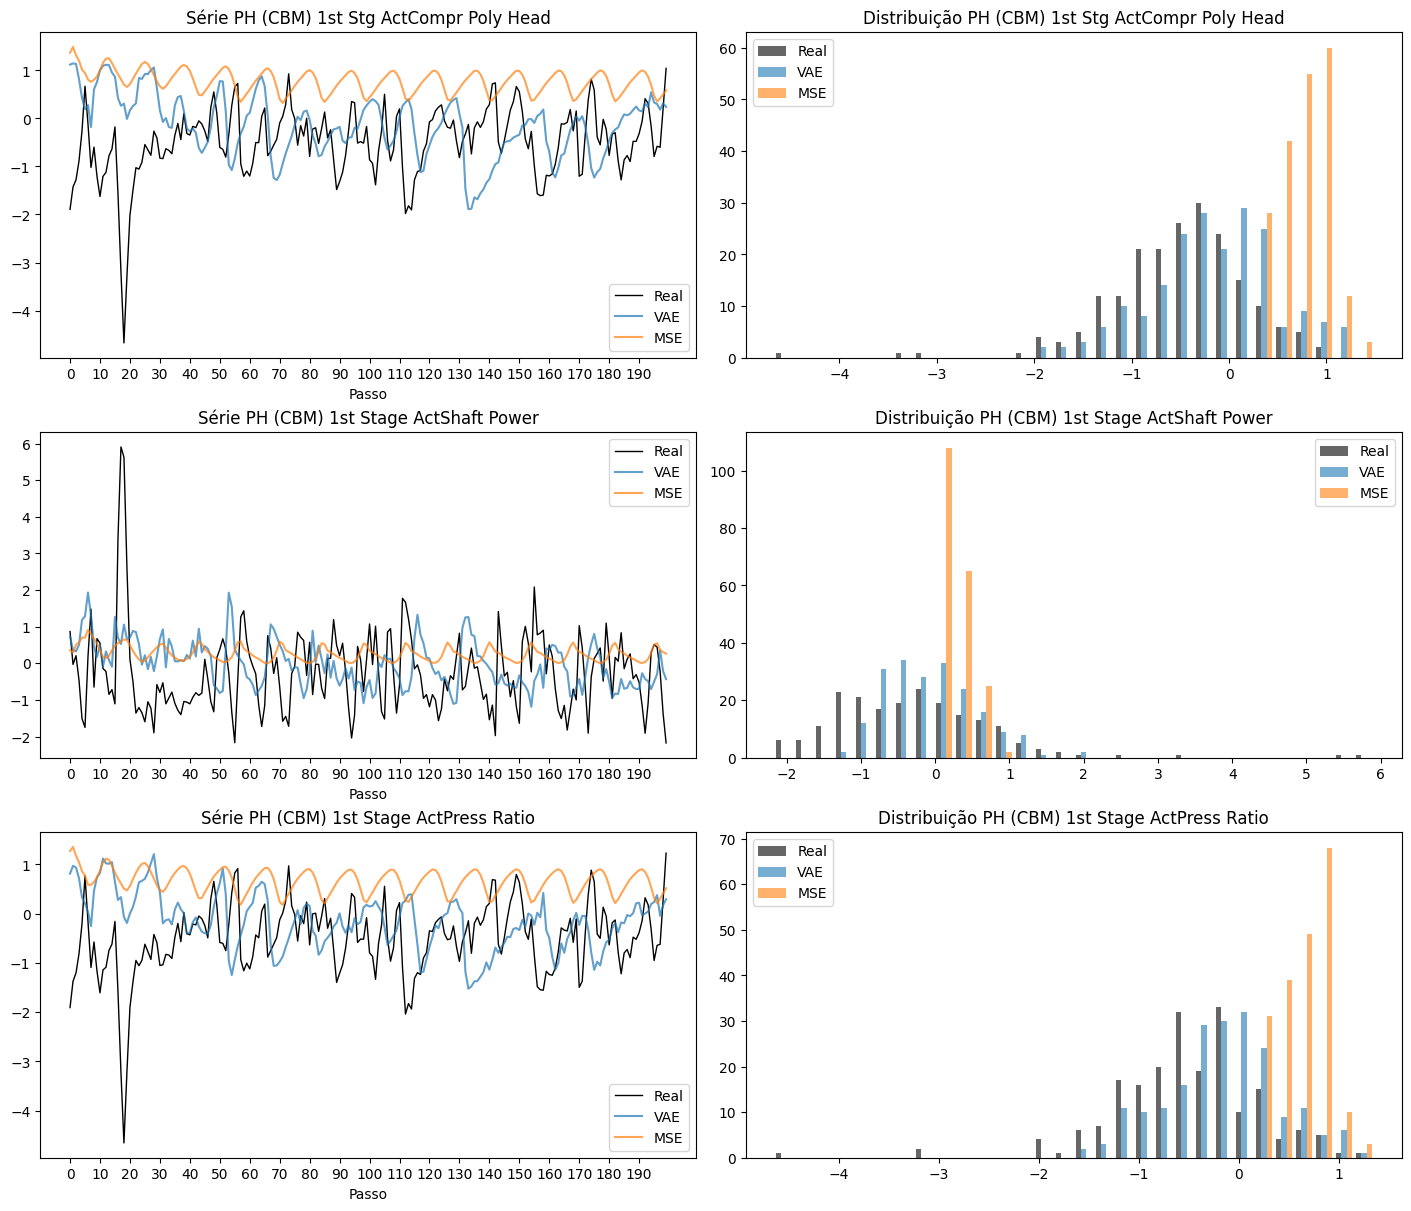

In [268]:
df_pred = df_predict
import matplotlib.pyplot as plt
import pandas as pd

df_real_cut = df_real.iloc[210010:210210].copy()  # 200 passos

# colunas únicas presentes nas três
cols_ = []
seen = set()
for c in df_pred.columns:
    if c in df_real_cut.columns and c not in seen:
        seen.add(c)
        cols_.append(c)
cols_ = cols_[:3]

def first_series(df, col):
    obj = df[col]
    return obj.iloc[:, 0] if isinstance(obj, pd.DataFrame) else obj

every_n = 10  # marca ticks a cada 10 passos

fig, axes = plt.subplots(len(cols_), 2, figsize=(14, 4 * len(cols_)), constrained_layout=True)
if len(cols_) == 1:
    axes = [axes]

for i, col in enumerate(cols_):
    ax_ts, ax_hist = axes[i]

    s_real = first_series(df_real_cut, col).reset_index(drop=True).dropna()
    s_vae  = first_series(df_vae, col).reset_index(drop=True).dropna()
    s_pred = first_series(df_pred, col).reset_index(drop=True).dropna()

    # séries com passo como X
    ax_ts.plot(range(len(s_real)), s_real.values, label="Real", color="black", lw=1)
    ax_ts.plot(range(len(s_vae)),  s_vae.values,  label="VAE", color="tab:blue", alpha=0.7)
    ax_ts.plot(range(len(s_pred)), s_pred.values, label="MSE", color="tab:orange", alpha=0.7)
    ax_ts.set_title(f"Série {col}")
    ax_ts.set_xlabel("Passo")
    ax_ts.set_xticks(range(0, len(s_real), every_n))
    ax_ts.legend()

    # distribuições
    ax_hist.hist([s_real, s_vae, s_pred],
                 bins=30,
                 alpha=0.6,
                 label=["Real", "VAE", "MSE"],
                 color=["black", "tab:blue", "tab:orange"])
    ax_hist.set_title(f"Distribuição {col}")
    ax_hist.legend()

plt.show()
